In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [42]:
import pandas as pd
import numpy as np

In [43]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [44]:
df = pd.read_csv("/content/drive/MyDrive/agroclimatic_clusters.csv")

In [45]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [46]:
df['cluster15'].value_counts()

5     89280
11    62496
4     55800
7     55056
14    31992
1     29760
8     27528
2     24552
9     22320
12    14136
0     10416
13     6696
6      5952
3      4464
10     1488
Name: cluster15, dtype: int64

In [47]:
a = []
for i in range(len(df)):
    if df['cluster15'][i]!=2:
        a.append(i)

In [48]:
df = df.drop(a)

In [49]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
5952,1958,1,24,26.3,12.0,47,0.1,assam,hailakandi,0,2,15,6,9,5,25,27
5953,1958,2,85,26.6,13.1,81,1.5,assam,hailakandi,0,2,15,6,9,5,25,27
5954,1958,3,39,32.1,17.3,73,-0.9,assam,hailakandi,0,2,15,6,9,5,25,27
5955,1958,4,303,32.7,21.5,137,0.1,assam,hailakandi,0,2,15,6,9,5,25,27
5956,1958,5,327,31.9,23.2,127,0.0,assam,hailakandi,0,2,15,6,9,5,25,27


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24552 entries, 5952 to 438215
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            24552 non-null  int64  
 1   Month           24552 non-null  int64  
 2   ppt(mm)         24552 non-null  int64  
 3   tmax(degC)      24552 non-null  float64
 4   tmin(degC)      24552 non-null  float64
 5   aet(mm)         24552 non-null  int64  
 6   PDSI(unitless)  24552 non-null  float64
 7   state           24552 non-null  object 
 8   district        24552 non-null  object 
 9   cluster14       24552 non-null  int64  
 10  cluster15       24552 non-null  int64  
 11  cluster18       24552 non-null  int64  
 12  cluster20       24552 non-null  int64  
 13  cluster25       24552 non-null  int64  
 14  cluster27       24552 non-null  int64  
 15  cluster30       24552 non-null  int64  
 16  cluster35       24552 non-null  int64  
dtypes: float64(3), int64(12), o

In [51]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(24552, 8)

In [52]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [53]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
5952,1958,1,24,26.3,12.0,47,0.1,hailakandi,1-1958
5953,1958,2,85,26.6,13.1,81,1.5,hailakandi,2-1958
5954,1958,3,39,32.1,17.3,73,-0.9,hailakandi,3-1958
5955,1958,4,303,32.7,21.5,137,0.1,hailakandi,4-1958
5956,1958,5,327,31.9,23.2,127,0.0,hailakandi,5-1958


In [54]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
5952,1958,1,24,26.3,12.0,47,0.1,hailakandi,1958-01-01,1
5953,1958,2,85,26.6,13.1,81,1.5,hailakandi,1958-02-01,1
5954,1958,3,39,32.1,17.3,73,-0.9,hailakandi,1958-03-01,1
5955,1958,4,303,32.7,21.5,137,0.1,hailakandi,1958-04-01,1
5956,1958,5,327,31.9,23.2,127,0.0,hailakandi,1958-05-01,1


In [56]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
5952,1958,1,24,47,0.1,hailakandi,1958-01-01,1,19.15
5953,1958,2,85,81,1.5,hailakandi,1958-02-01,1,19.85
5954,1958,3,39,73,-0.9,hailakandi,1958-03-01,1,24.70
5955,1958,4,303,137,0.1,hailakandi,1958-04-01,1,27.10
5956,1958,5,327,127,0.0,hailakandi,1958-05-01,1,27.55


In [57]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
438211,2019,8,499,93,1.7,nicobar islands,2019-08-01,1,26.65
438212,2019,9,611,86,2.3,nicobar islands,2019-09-01,1,26.55
438213,2019,10,163,114,1.2,nicobar islands,2019-10-01,1,27.25
438214,2019,11,133,100,-1.3,nicobar islands,2019-11-01,1,27.25
438215,2019,12,13,44,-1.7,nicobar islands,2019-12-01,1,26.65


In [58]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,ppt(mm),y,aet(mm),district
0,1981-01-01,65,18.25,66,hailakandi
1,1981-02-01,29,20.05,49,hailakandi
2,1981-03-01,142,23.35,115,hailakandi
3,1981-04-01,676,24.65,117,hailakandi
4,1981-05-01,343,26.75,133,hailakandi


In [59]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
6684,2019,1,4,36,-3.3,hailakandi,2019-01-01,1,18.95
6685,2019,2,28,45,-3.1,hailakandi,2019-02-01,1,21.05
6686,2019,3,70,83,-3.4,hailakandi,2019-03-01,1,24.40
6687,2019,4,158,142,-3.4,hailakandi,2019-04-01,1,27.25
6688,2019,5,310,144,-3.5,hailakandi,2019-05-01,1,28.20
...,...,...,...,...,...,...,...,...,...
438211,2019,8,499,93,1.7,nicobar islands,2019-08-01,1,26.65
438212,2019,9,611,86,2.3,nicobar islands,2019-09-01,1,26.55
438213,2019,10,163,114,1.2,nicobar islands,2019-10-01,1,27.25
438214,2019,11,133,100,-1.3,nicobar islands,2019-11-01,1,27.25


In [60]:
from fbprophet import Prophet

In [61]:

model = Prophet()

In [62]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
train.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
train.tail()


,ds,ppt(mm),y,aet(mm),district
15043,2018-08-01,472,26.40,94,nicobar islands
15044,2018-09-01,320,26.65,99,nicobar islands
15045,2018-10-01,407,26.85,95,nicobar islands
15046,2018-11-01,260,27.85,109,nicobar islands
15047,2018-12-01,156,27.80,102,nicobar islands


In [65]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [66]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [67]:

forecast = model.predict(fut)

In [68]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,22.147590,21.368179,29.038542,22.146535,22.148988,3.183806,3.183806,3.183806,3.183806,3.183806,3.183806,0.0,0.0,0.0,25.331395
465,2019-09-30,22.144376,20.106108,28.032746,22.142975,22.146164,1.870618,1.870618,1.870618,1.870618,1.870618,1.870618,0.0,0.0,0.0,24.014994
466,2019-10-31,22.141056,16.586475,24.611210,22.139265,22.143302,-1.281650,-1.281650,-1.281650,-1.281650,-1.281650,-1.281650,0.0,0.0,0.0,20.859406
467,2019-11-30,22.137842,13.316624,21.044852,22.135640,22.140713,-5.043854,-5.043854,-5.043854,-5.043854,-5.043854,-5.043854,0.0,0.0,0.0,17.093988
468,2019-12-31,22.134522,11.504391,19.156795,22.131860,22.138080,-6.586524,-6.586524,-6.586524,-6.586524,-6.586524,-6.586524,0.0,0.0,0.0,15.547998


In [69]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,25.331395,21.368179,29.038542
465,2019-09-30,24.014994,20.106108,28.032746
466,2019-10-31,20.859406,16.586475,24.611210
467,2019-11-30,17.093988,13.316624,21.044852
468,2019-12-31,15.547998,11.504391,19.156795


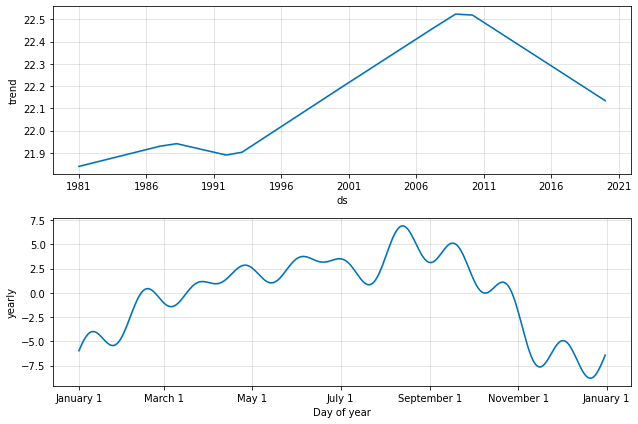

In [70]:
fig2 = model.plot_components(forecast)

In [71]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

(12, 1) (396, 1)
14.392360282506436


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,mid_temp,Month,yhat
0,18.95,1,17.586322
1,19.10,1,17.586322
2,12.15,1,17.586322
3,18.15,1,17.586322
4,27.50,1,17.586322
...,...,...,...
391,17.60,12,15.547998
392,13.05,12,15.547998
393,17.50,12,15.547998
394,17.25,12,15.547998


In [72]:
import matplotlib.pyplot as plt

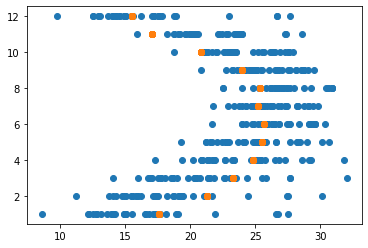

In [73]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()


In [74]:
import pickle

In [75]:
filename = 'Cluster 15 - 2.sav'
pickle.dump(model, open(filename, 'wb'))

In [76]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(fut)

In [77]:
result.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,21.838789,11.977544,19.946546,21.838789,21.838789,-5.957514,-5.957514,-5.957514,-5.957514,-5.957514,-5.957514,0.0,0.0,0.0,15.881275
1,1981-02-01,21.840075,13.865200,21.658519,21.840075,21.840075,-4.137126,-4.137126,-4.137126,-4.137126,-4.137126,-4.137126,0.0,0.0,0.0,17.702949
2,1981-03-01,21.841237,16.939877,24.600407,21.841237,21.841237,-1.072033,-1.072033,-1.072033,-1.072033,-1.072033,-1.072033,0.0,0.0,0.0,20.769205
3,1981-04-01,21.842523,19.109704,26.726426,21.842523,21.842523,1.055016,1.055016,1.055016,1.055016,1.055016,1.055016,0.0,0.0,0.0,22.897540
4,1981-05-01,21.843768,20.397593,28.312555,21.843768,21.843768,2.537038,2.537038,2.537038,2.537038,2.537038,2.537038,0.0,0.0,0.0,24.380806
